# Plot ice thickness difference between OGGM balance gradients and user defined mass balance gradient

In [1]:
##Ben Pelto June 2019
###using this script to plot the thickness difference for an individual glacier between OGGM linear gradient and 
###a user defined mass balance gradient

# Python imports
import os
import pandas as pd
import salem
import numpy as np
import xarray as xr
import oggm
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.workflow import execute_entity_task, gis_prepro_tasks, climate_tasks

##plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import pylab

In [2]:
#data points gradients
grad = [6.84, 9.8, 7.11, 7.95, 10.84, 6.01, 7.92] # mm w.e. m-1 

srtm = [-1.58, -6.95, -6.47, -5.71, -5.86, -6.11, 0.48]
products_dir = '/home/pelto/Desktop/ice_thick/JoG/'
glacier = ['Kokanee', 'Haig', 'Conrad', 'W.Washmawapta', 'Illecillewaet', 'Nordic', 'Zillmer']

WORKING_DIR = utils.get_temp_dir('ice_thickness')
utils.mkdir(WORKING_DIR, reset=True)
cfg.initialize(logging_level='WORKFLOW')
cfg.PATHS['working_dir'] = WORKING_DIR

# dx = 100 
# cfg.PARAMS['use_rgi_area'] = False
cfg.PARAMS['border'] = 10

# Get the RGI glaciers for the run.
rgi_list = ['RGI60-02.00147', 'RGI60-02.01857', 'RGI60-02.02171', 'RGI60-02.03411', 'RGI60-02.03688'
            , 'RGI60-02.04264', 'RGI60-02.07780']

2019-11-29 15:43:13: oggm.cfg: Using configuration file: /home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/oggm/params.cfg


In [3]:
rgidf = utils.get_rgi_glacier_entities(rgi_list) 
gdirs = workflow.init_glacier_regions(rgidf)
workflow.gis_prepro_tasks(gdirs)
workflow.climate_tasks(gdirs)
workflow.inversion_tasks(gdirs)
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);
# gdir = gdirs[0]
# tasks.init_present_time_glacier(gdirs) 

2019-11-29 15:43:14: oggm.workflow: Execute entity task define_glacier_region on 7 glaciers
2019-11-29 15:43:14: oggm.workflow: Multiprocessing: using all available processors (N=8)
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers()

In [4]:
import geopandas as gpd
shape=gpd.read_file("/home/pelto/GIS/outlines/ice_thick_glaciers.shp")
shape[0:4]

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-02.00147,G242863E49749N,20049999,20069999,-117.137,49.7490,2,3,1.801,2258,...,33,1738,0.0,0.0,0.0,0.0,0.0,9,None,"POLYGON ((-117.151037 49.75008800000006, -117...."
1,RGI60-02.01857,G244699E50711N,20049999,20069999,-115.301,50.7108,2,3,2.585,2482,...,116,2839,0.0,0.0,0.0,0.0,0.0,9,None,"POLYGON ((-115.312561 50.71309000000008, -115...."
2,RGI60-02.03411,G243670E51177N,20049999,20069999,-116.330,51.1770,2,3,0.872,2390,...,69,1181,0.0,0.0,0.0,0.0,0.0,9,None,"POLYGON ((-116.323606 51.18003200000004, -116...."
3,RGI60-02.07780,G240419E52671N,20049999,20069999,-119.581,52.6705,2,3,6.490,1717,...,356,4150,0.0,0.0,0.0,0.0,0.0,9,None,POLYGON ((-119.5952742098528 52.68276424606576...


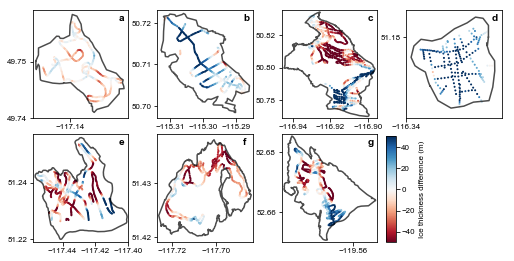

In [5]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'

fig, axarr = plt.subplots(2, 4, sharey=False, sharex=False, figsize=(7,3.5))#(12, 6))
j, k = 0, 0
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

shape.sort_values('CenLat', inplace=True, ascending=True) #sort the shapefile objects by latitude
GIDX= shape.index # save an index of the shapefiles
count=0

for i in range(7):
       
    #df=DF_Final[DF_Final.index==i]
    df = pd.read_csv(products_dir[:-4] + glacier[count] + '_MBgrad.csv')  #read in csv containing inversion data
    im = axarr[j, k].scatter(df.lon, df.lat, c=df['GPR-oggm'], cmap='RdBu', vmax=50, vmin=-50, s=1.)   
#     axarr[j, k].set_title(glacier[i])
       
    x,y=shape['geometry'][GIDX[count]].exterior.xy
    axarr[j, k].plot(x,y,color='k',alpha=0.7)
    
    ymin = np.round(min(y),3) -0.001
    ymax = np.round(max(y),3) + 0.001
    xmin = np.round(min(x),3) -0.001
    xmax = np.round(max(x),3) + 0.001

    axarr[j, k].set_xlim(xmin, xmax )
    axarr[j, k].set_ylim(ymin, ymax )
#     axarr[j, k].set_xticks(np.round(np.arange(xmin, xmax, 0.02),2))
#     axarr[j, k].ticklabel_format(useOffset=False)
    axarr[1, 3].axis('off')
#     axarr[j, k].set_yticks(np.round(np.arange(ymin, ymax, 0.02),2))
    if count == 2 or count == 4 or count == 6:
        axarr[j,k].yaxis.set_major_locator(ticker.MultipleLocator(0.02))
    else:
        axarr[j,k].yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        
    if count == 1: #or count == 3:
        axarr[j,k].xaxis.set_major_locator(ticker.MultipleLocator(0.01))
    else:
        axarr[j,k].xaxis.set_major_locator(ticker.MultipleLocator(0.02))
    if count == 6:
        axarr[j,k].xaxis.set_major_locator(ticker.MultipleLocator(0.04))
    axarr[j,k].text(0.9, 0.9, letter[count], transform=axarr[j,k].transAxes, fontweight='bold', fontsize=10)
    
    count+=1  # work through the index
    
    k += 1

    if i == 3: #changed to 2, 1 worked for 2x2 panel plot
        j += 1
        k = 0
fig.subplots_adjust(bottom=0.06, top=0.98, left=0.06, right=0.99, wspace=0.3, hspace=0.15) 

#Add an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height
cb_ax = fig.add_axes([0.76, 0.06, 0.02, 0.42]) 
cbar = fig.colorbar(im, cax=cb_ax, label='Ice thickness difference (m)')
          
# plt.colorbar(im, pad=0.00, label='Ice thickness (m)')  
# plt.tight_layout(pad=0)
plt.savefig(products_dir + '_gpr_oggm_thick_diff_all.pdf', dpi=300) 